# Machine Vision Basics for Robotics

In [1]:
import os
import numpy as np
import matplotlib.pylab as plt

In [2]:
file_1 = '.jpg'
mask_1 = '.jpg'
mask_2 = '.jpg'
PATH = './images/'

# Visualize data

In [3]:
image = plt.imread(os.path.join(PATH, file_1))
mask = plt.imread(os.path.join(PATH, mask_1))
int_mask = plt.imread(os.path.join(PATH, mask_2))

## Display an RGB image sample

In [4]:
plt.figure(figsize=(6,6))
plt.imshow(image)

## Display a segmentation mask (blue is 'common blue mussel', green is 'Ciona', white is 'VOID')

In [5]:
plt.figure(figsize=(6,6))
plt.imshow(mask)

# Image Filtering

In [6]:
from scipy import ndimage # image processing of n-dimensional images
from scipy import misc

## Smoothing

In [7]:
smooth_image = ndimage.gaussian_filter(image, sigma=3)

In [8]:
# the filter washes out our colour! Set sigma to one to restore colour.
plt.figure(figsize=(6,6))
plt.imshow(smooth_image)

In [9]:
smooth_image.shape

(224, 224, 3)

## Sharpening

In [10]:
filter_smoothed_f = ndimage.gaussian_filter(smooth_image, 1)
filter_original_f = ndimage.gaussian_filter(image, 1)
alpha = 30

sharpened_smooth = smooth_image + alpha * (smooth_image - filter_smoothed_f)
sharpened_original = image + alpha * (image - filter_original_f)

# display
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)  # left side
ax1.imshow(sharpened_smooth)
ax1.set_axis_off()
ax1.set_title("Sharpened blurred")

ax2 = fig.add_subplot(122)  # right side
ax2.imshow(sharpened_original)
ax2.set_axis_off()
ax2.set_title("Sharpened original")

In [11]:
median = ndimage.median_filter(image, 3)

fig = plt.figure(figsize=(14,14))

ax1 = fig.add_subplot(121)  # left side
ax1.imshow(image)
ax1.set_axis_off()
ax1.set_title("Original")

ax2 = fig.add_subplot(122)  # right side
ax2.imshow(median)
ax2.set_axis_off()
ax2.set_title("Median filtered")

# Feature Extraction

In [12]:
# first with synthetic data
im = np.zeros((256, 256)) # this function takes a tuple for shape
im[64:-64, 64:-64] = 1 # make a big square
im[96:-96, 0:25] = 1 # make a small rectangle

# add some random noise
noise = np.random.randn(im.shape[0], im.shape[1]) / 2# this function does not
im += noise

In [13]:
im = ndimage.rotate(im, 15, mode='constant')
im = ndimage.gaussian_filter(im, 8)

## Sobel edge detection

In [14]:
sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

## Canny edge detection

In [15]:
from skimage.feature import canny
canny_edges = canny(im, sigma=5)

In [16]:
%matplotlib inline

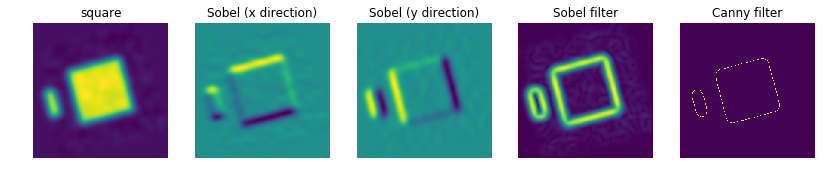

In [17]:
fig = plt.figure(figsize=(14,14))

ax1 = fig.add_subplot(151)  # far left side
ax1.imshow(im)
ax1.set_axis_off()
ax1.set_title("square")

ax2 = fig.add_subplot(152)  # left middle
ax2.imshow(sx)
ax2.set_axis_off()
ax2.set_title("Sobel (x direction)")

ax3 = fig.add_subplot(153)  # right middle
ax3.imshow(sy)
ax3.set_axis_off()
ax3.set_title("Sobel (y direction)")

ax4 = fig.add_subplot(154)  # right middle
ax4.imshow(sob)
ax4.set_axis_off()
ax4.set_title("Sobel filter")

ax5 = fig.add_subplot(155)  # right middle
ax5.imshow(canny_edges)
ax5.set_axis_off()
ax5.set_title("Canny filter")

### Turn up the noise!

In [18]:
# Add MORE noise (we don't Gaussian blur it out this time)
noise = np.random.randn(im.shape[0], im.shape[1]) / 2
im += noise

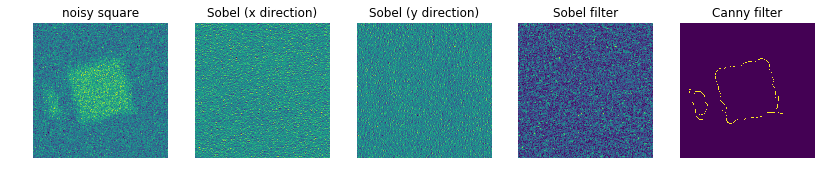

In [19]:
sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)
canny_edges = canny(im, sigma=5)

fig = plt.figure(figsize=(14,14))

ax1 = fig.add_subplot(151)  # far left side
ax1.imshow(im)
ax1.set_axis_off()
ax1.set_title("noisy square")

ax2 = fig.add_subplot(152)  # left middle
ax2.imshow(sx)
ax2.set_axis_off()
ax2.set_title("Sobel (x direction)")

ax3 = fig.add_subplot(153)  # right middle
ax3.imshow(sy)
ax3.set_axis_off()
ax3.set_title("Sobel (y direction)")

ax4 = fig.add_subplot(154)  # right middle
ax4.imshow(sob)
ax4.set_axis_off()
ax4.set_title("Sobel filter")

ax5 = fig.add_subplot(155)  # right middle
ax5.imshow(canny_edges)
ax5.set_axis_off()
ax5.set_title("Canny filter")

The canny filter performs much better against added noise ...

## Segmentation

In [19]:
hist, bin_edges = np.histogram(image, bins=100)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

Text(0,0.5,'frequency')

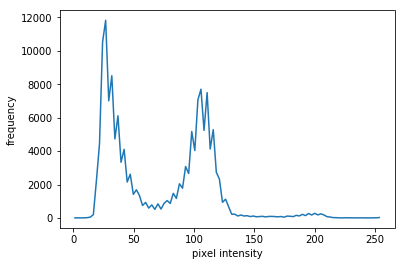

In [20]:
#with plt.xkcd(): # might cause a warning "Humor Sans" not found :)
plt.plot(bin_centers, hist)
plt.xlabel('pixel intensity')
plt.ylabel('frequency')

In [21]:
image_thresh = image.copy() # make a copy so we don't mess up original image
image_thresh[image < 50] = 0

Text(0,0.5,'frequency')

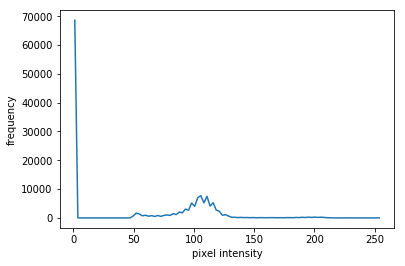

In [22]:
hist, bin_edges = np.histogram(image_thresh, bins=100)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
#with plt.xkcd(): # might cause a warning "Humor Sans" not found :)
plt.plot(bin_centers, hist)
plt.xlabel('pixel intensity')
plt.ylabel('frequency')

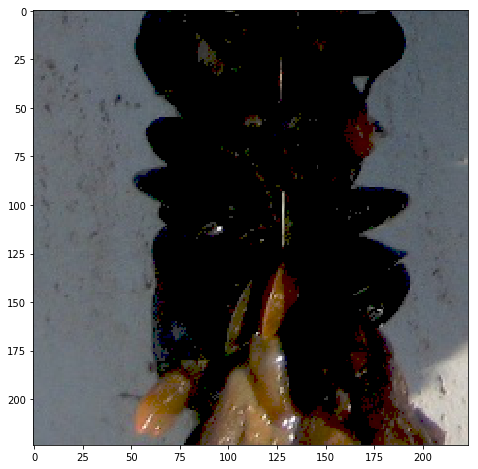

In [23]:
plt.figure(figsize=(8,8))
plt.imshow(image_thresh)

### Histogram Equalization

In [24]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

Display the grayscale mask (showing mussel class) side by side with mask subject to 3x3 erosion 

In [25]:
from skimage import exposure

# Contrast stretching
p2, p98 = np.percentile(image, (2, 98))
img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(image)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)

/export/mlrg/gallowaa/anaconda2/envs/tf140-py35/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "
/export/mlrg/gallowaa/anaconda2/envs/tf140-py35/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


/export/mlrg/gallowaa/anaconda2/envs/tf140-py35/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


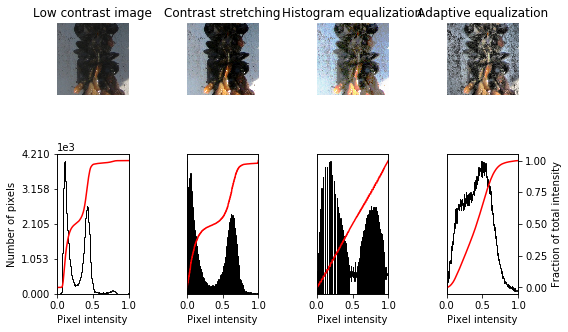

In [28]:
from skimage import img_as_float

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(image, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()

# Morphology

In [109]:
integer_mask = int_mask.copy()
integer_mask[integer_mask == 255] = 0 # get rid of the void class for demo purposes
integer_mask[integer_mask == 1] = 255 # set the blue mussel class to full-scale for demo purposes

#opened_mask = ndimage.binary_opening(integer_mask, structure=np.ones((3,3)))
#closed_mask = ndimage.binary_closing(opened_mask, structure=np.ones((3,3)))

# this will remove structures that are smaller than 3x3 structure
erosion_mask = ndimage.binary_erosion(integer_mask, structure=np.ones((2,2)))

# alternative way to remove noise
median_mask = ndimage.median_filter(integer_mask, 4)

Text(0.5,1,'Median')

/export/mlrg/gallowaa/anaconda2/envs/tf140-py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


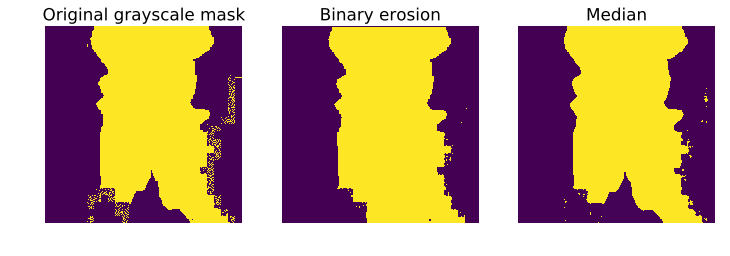

In [110]:
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(131)  # left 
ax1.imshow(integer_mask)
ax1.set_axis_off()
ax1.set_title("Original grayscale mask")

ax2 = fig.add_subplot(132)  # middle
ax2.imshow(erosion_mask)
ax2.set_axis_off()
ax2.set_title("Binary erosion")

ax3 = fig.add_subplot(133)  # right
ax3.imshow(median_mask)
ax3.set_axis_off()
ax3.set_title("Median")

Sometimes a median filter can clean up an image really well, note it preserves the indentation where Ciona are
in bottom / middle area